In [1]:
import pandas as pd

In [16]:
data = pd.read_pickle("/Users/znamenp/data/cell_barcode_df.pkl")
# filter out rows where all_barcodes is NaN
data = data.dropna(subset=["all_barcodes"])

In [25]:
data[data["is_starter"] == True]["all_barcodes"]

# contatenate all barcodes into a big list
all_barcodes = []
for barcodes in data[data["is_starter"] == True]["all_barcodes"]:
    all_barcodes.extend(barcodes)

# count the number of times each barcode appears among starter cells
barcode_counts = pd.Series(all_barcodes).value_counts()
# barcodes which only appear once
singletons = barcode_counts.index[barcode_counts == 1]
singletons = set(singletons.values)

In [26]:
# select "all_barcodes" which are in signletons and assign to a new column
data["unique_barcodes"] = data["all_barcodes"].apply(
    lambda x: singletons.intersection(x)
)

Text(0, 0.5, 'Number of cells')

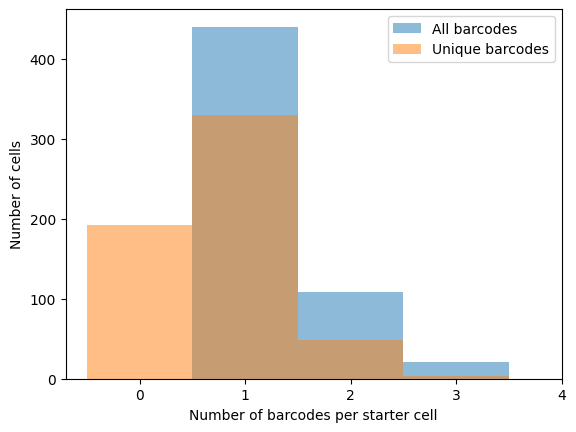

In [42]:
import numpy as np

data[data["is_starter"] == True].apply(
    lambda x: len(x["unique_barcodes"]), axis=1
).value_counts()

# plot the distribution of the number of unique barcodes per starter cell
data[data["is_starter"] == True].apply(lambda x: len(x["all_barcodes"]), axis=1).hist(
    bins=np.arange(0, 5, 1) - 0.5, alpha=0.5
)
data[data["is_starter"] == True].apply(
    lambda x: len(x["unique_barcodes"]), axis=1
).hist(bins=np.arange(0, 5, 1) - 0.5, alpha=0.5)

plt.legend(["All barcodes", "Unique barcodes"])
# turn off the grid
import matplotlib.pyplot as plt

plt.grid(False)
# skip non-integer ticks
plt.xticks(np.arange(0, 5, 1))
plt.xlabel("Number of barcodes per starter cell")
plt.ylabel("Number of cells")

In [57]:
# sets of unique barcodes with more than one element
doublets = (
    data[data["is_starter"] == True]
    .apply(
        lambda x: x["unique_barcodes"] if len(x["unique_barcodes"]) == 2 else None,
        axis=1,
    )
    .dropna()
    .values
)

In [77]:
bc_counts = []

for doublet in doublets:
    print(doublet)
    bc1, bc2 = doublet
    nbc1 = data.apply(lambda x: bc1 in x["unique_barcodes"], axis=1).sum()
    nbc2 = data.apply(lambda x: bc2 in x["unique_barcodes"], axis=1).sum()
    nboth = data.apply(
        lambda x: bc1 in x["unique_barcodes"] and bc2 in x["unique_barcodes"], axis=1
    ).sum()
    nany = data.apply(
        lambda x: bc1 in x["unique_barcodes"] or bc2 in x["unique_barcodes"], axis=1
    ).sum()
    print(nbc1, nbc2, nboth, nany)
    bc_counts.append([nbc1 - 1, nbc2 - 1, nboth - 1, nany - 1])

{'ACCGAGGAGTCGCA', 'TTAATGACTTAAGA'}
23 33 1 55
{'GTTCGGGATAAACA', 'TTTATAAAGCCACT'}
3 12 2 13
{'AGAGCCCAGATTTA', 'GCTGTAATTCATTG'}
103 14 1 116
{'CGGATACTTCTTTC', 'GAAACGAATGTGGA'}
76 3 1 78
{'TATCCTCTCGATCA', 'CAGGCGGAACAAAC'}
152 28 2 178
{'CCGCCTGCACTATC', 'GTCCCATATTCAGT'}
60 29 1 88
{'TAAGCGTGCTAAAT', 'CCTCCATCCACCAG'}
40 17 1 56
{'TTTCTGTCTAAATG', 'TTACAGCCTATCTT'}
38 34 1 71
{'TTACTTTTCTCTTA', 'AGTTAAGGGACAAC'}
51 47 1 97
{'CATTTAAATCTATG', 'TTTAATTACACTAA'}
14 4 1 17
{'GAACTTTCCTCCTT', 'GATTTAAGCGGCTC'}
19 41 1 59
{'GTGGCTTTTGGTTA', 'CCAACGAATAGATC'}
1 15 1 15
{'CAGTACAAAGGTAT', 'GAATGAGCCTGGCA'}
10 4 1 13
{'CAAGAAGTCTAGGT', 'GCGCAATCCTTTCT'}
47 22 1 68
{'CATGACAAAAGGAA', 'GCCATGAGAGGCTT'}
35 56 1 90
{'TTACCTATCAACAG', 'TATTGTATTGGATT'}
11 23 1 33
{'CAGATCCGTGGAAT', 'TCCTCTTATGCAAT'}
10 40 1 49
{'TGCATGTCGTATGA', 'CGTATCAGGTTCTT'}
5 7 1 11
{'CACGTTTTAAACTA', 'CGAACTGTATCGTA'}
1 1 1 1
{'ATTACGCGATATAG', 'AGCGAACGGGTAAA'}
9 10 1 18
{'CGATATCAGAAGTC', 'AGAATTCCACGATC'}
9 2 1 10
{

Text(0, 0.5, 'Number of cells with barcode 2')

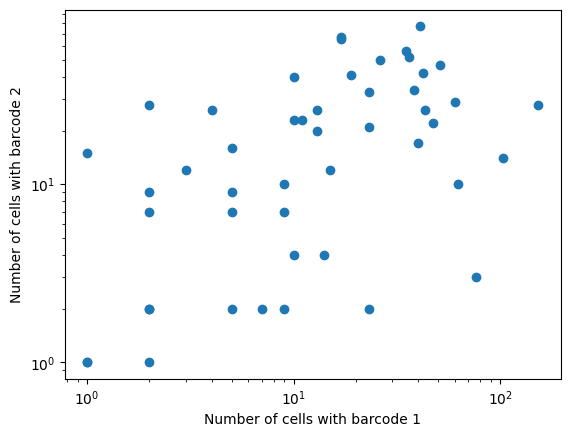

In [75]:
plt.loglog(1 + np.array(bc_counts)[:, 0], 1 + np.array(bc_counts)[:, 1], "o")
plt.xlabel("Number of cells with barcode 1")
plt.ylabel("Number of cells with barcode 2")

/var/folders/jz/9byph3w96m54jr8zhqr0c7w81v6c0h/T/ipykernel_43241/4050237461.py:3: RuntimeWarning: invalid value encountered in divide
  plt.hist(bc_counts[:, 2] / bc_counts[:, 3])


Text(0.5, 0, 'Proportion of presynaptic cells with both barcodes')

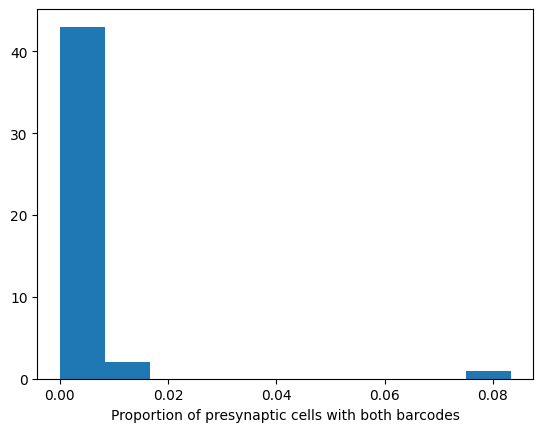

In [81]:
bc_counts = np.array(bc_counts)

plt.hist(bc_counts[:, 2] / bc_counts[:, 3])
plt.xlabel("Proportion of presynaptic cells with both barcodes")